<a href="https://colab.research.google.com/github/dhyatt4198/CS4410-_Homework/blob/main/CS4410_ExtraCredit_DylanHyatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bonus Assignment: Image Classification with a Pretrained Model (ResNet/MobileNet)**

## Setup Environment, Check GPU, and Import Libraries

In [41]:
import torch
from torchvision import models
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Mount Google Drive and Set Image Folder Path

In [42]:
from google.colab import drive
import os

drive.mount('/content/drive')

image_folder = "/content/drive/MyDrive/birds"

image_files = [
    os.path.join(image_folder, f)
    for f in os.listdir(image_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
]

print(f"Found {len(image_files)} image(s):")
for f in image_files:
  print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3 image(s):
 - /content/drive/MyDrive/birds/bird1.jpg
 - /content/drive/MyDrive/birds/bird2.jpg
 - /content/drive/MyDrive/birds/bird3.jpg


## Load ResNet50

In [43]:
from torchvision.models import resnet50, ResNet50_Weights

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
model = model.to(device)
model.eval()

print("ResNet50 model loaded and ready.")

ResNet50 model loaded and ready.


## Define Image Preprocessing Transformations

In [44]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print("Preprocessing pipeline ready.")

Preprocessing pipeline ready.


## Load ImageNet Class Labels

In [45]:
import urllib.request

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
class_idx = urllib.request.urlopen(url)
labels = [line.decode('utf-8').strip() for line in class_idx] # Decode bytes to strings

print(f"Loaded {len(labels)} ImageNet class labels.")

Loaded 1000 ImageNet class labels.


## Define Helper Function to Make Predictions + Display Function

In [46]:
def predict_image(image_path):
    image = Image.open(image_path).convert('RGB')
    img_tensor = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
      outputs = model(img_tensor)
      probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

    top_5_prob, top_5_catid = torch.topk(probabilities, 5)
    preds = [(labels[catid], prob.item()) for catid, prob in zip(top_5_catid, top_5_prob)]

    #display image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Top 5 Predictions:", fontsize=14)



    plt.show() # Show image and text predictions together

    print(f"{os.path.basename(image_path)}")
    print("=" * 50)
    for label, prob in preds:
      print(f"{label:<30} {prob:.2%}") # Format probability as percentage in print output
    print("=" * 50)

## Run Model

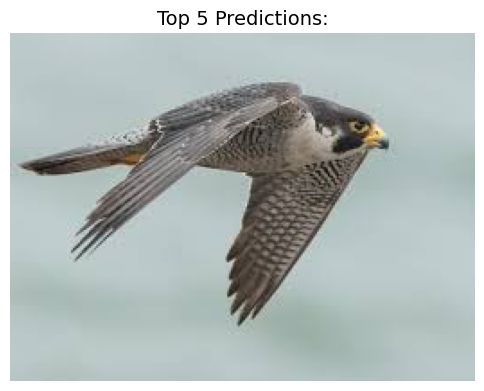

bird1.jpg
kite                           98.77%
prairie chicken                0.71%
red-breasted merganser         0.07%
coucal                         0.07%
black grouse                   0.07%


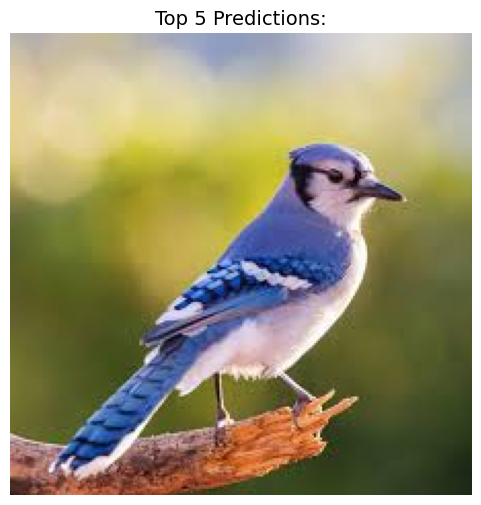

bird2.jpg
jay                            99.96%
indigo bunting                 0.01%
magpie                         0.00%
damselfly                      0.00%
brambling                      0.00%


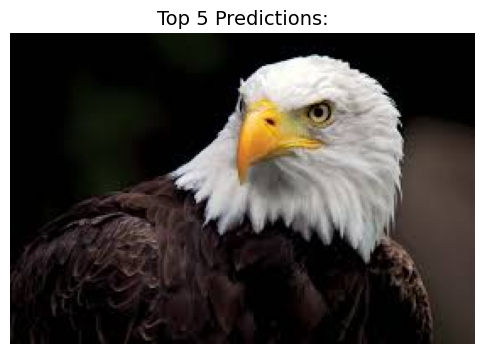

bird3.jpg
bald eagle                     99.48%
kite                           0.48%
albatross                      0.01%
vulture                        0.00%
black grouse                   0.00%


In [47]:
for img_path in image_files:
  predict_image(img_path)